In [24]:
from __future__ import print_function, division

In [331]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import selenium
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

In [2]:
# initializing the data frame
columns = ['summoner_name', 'rank', 'hours_played', 'champ_pool', 'percent_games_duo', 'avg_kda']
initial_data = pd.DataFrame(columns = columns)

In [3]:
pd.read_html('https://na.op.gg/ranking/ladder/')

[    Unnamed: 0         Summoners        Tier        LP  Level  Win Ratio
 0            6           1 Shady  Challenger  1,226 LP    283  68461153%
 1            7          iKingVex  Challenger  1,223 LP    356  56648854%
 2            8            JuIius  Challenger  1,203 LP    354  61152454%
 3            9        unrequ1ted  Challenger  1,184 LP    248  43735056%
 4           10     Rank 1 GIobal  Challenger  1,162 LP     63  22113562%
 5           11         FLY V1per  Challenger  1,113 LP    248  49141454%
 6           12      TSM Tactical  Challenger  1,110 LP     82  27115863%
 7           13  Pants are Dragon  Challenger  1,091 LP    224  41133055%
 8           14         From Iron  Challenger  1,082 LP     92  35224759%
 9           15          TSM Zven  Challenger  1,080 LP    246  51039456%
 10          16      Adrian Seira  Challenger  1,053 LP    138  48342353%
 11          17          Scoooped  Challenger  1,050 LP    153  45739154%
 12          18            deftIy  Cha

In [26]:
requests.__path__

['/Users/local/anaconda3/envs/metis/lib/python3.6/site-packages/requests']

In [219]:
import requests

url = 'https://na.op.gg/summoner/userName=FriedenInGeduld'
response = requests.get(url)
print(response.text)

	<!DOCTYPE html>
	<!--
	  ,ad8888ba,   88888888ba         ,ad8888ba,    ,ad8888ba,
	 d8"'    `"8b  88      "8b       d8"'    `"8b  d8"'    `"8b
	d8'        `8b 88      ,8P      d8'           d8'
	88          88 88aaaaaa8P'      88            88
	88          88 88""""""'        88      88888 88      88888
	Y8,        ,8P 88               Y8,        88 Y8,        88
	 Y8a.    .a8P  88                Y8a.    .a88  Y8a.    .a88
	  `"Y8888Y"'   88     dev@op.gg   `"Y88888P"    `"Y88888P"

		 Copyright © 2013-2019 OP.GG. All rights reserved.
-->
<html lang="en_US">
<head>
	<!-- Google Tag Manager -->
	<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
	new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
	j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
	'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
	})(window,document,'script','dataLayer','GTM-WXXJDMH');</script>
	<!-- End Google Tag Manager -->
	

In [220]:
from bs4 import BeautifulSoup

page = response.text
soup = BeautifulSoup(page, 'lxml')

In [33]:
print(soup.prettify())

<!DOCTYPE html>
<!--
	  ,ad8888ba,   88888888ba         ,ad8888ba,    ,ad8888ba,
	 d8"'    `"8b  88      "8b       d8"'    `"8b  d8"'    `"8b
	d8'        `8b 88      ,8P      d8'           d8'
	88          88 88aaaaaa8P'      88            88
	88          88 88""""""'        88      88888 88      88888
	Y8,        ,8P 88               Y8,        88 Y8,        88
	 Y8a.    .a8P  88                Y8a.    .a88  Y8a.    .a88
	  `"Y8888Y"'   88     dev@op.gg   `"Y88888P"    `"Y88888P"

		 Copyright © 2013-2019 OP.GG. All rights reserved.
-->
<html lang="en_US">
 <head>
  <!-- Google Tag Manager -->
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
	new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
	j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
	'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
	})(window,document,'script','dataLayer','GTM-WXXJDMH');
  </script>
  <!-- End Google Tag Mana

In [93]:
url2 = 'https://na.op.gg/ranking/ladder/page=1'
response2 = requests.get(url2)
print(response2.text)

	<!DOCTYPE html>
	<!--
	  ,ad8888ba,   88888888ba         ,ad8888ba,    ,ad8888ba,
	 d8"'    `"8b  88      "8b       d8"'    `"8b  d8"'    `"8b
	d8'        `8b 88      ,8P      d8'           d8'
	88          88 88aaaaaa8P'      88            88
	88          88 88""""""'        88      88888 88      88888
	Y8,        ,8P 88               Y8,        88 Y8,        88
	 Y8a.    .a8P  88                Y8a.    .a88  Y8a.    .a88
	  `"Y8888Y"'   88     dev@op.gg   `"Y88888P"    `"Y88888P"

		 Copyright © 2013-2019 OP.GG. All rights reserved.
-->
<html lang="en_US">
<head>
	<!-- Google Tag Manager -->
	<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
	new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
	j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
	'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
	})(window,document,'script','dataLayer','GTM-WXXJDMH');</script>
	<!-- End Google Tag Manager -->
	

In [94]:
page2 = response2.text
soup2 = BeautifulSoup(page2, 'lxml')
print(soup2.prettify())

<!DOCTYPE html>
<!--
	  ,ad8888ba,   88888888ba         ,ad8888ba,    ,ad8888ba,
	 d8"'    `"8b  88      "8b       d8"'    `"8b  d8"'    `"8b
	d8'        `8b 88      ,8P      d8'           d8'
	88          88 88aaaaaa8P'      88            88
	88          88 88""""""'        88      88888 88      88888
	Y8,        ,8P 88               Y8,        88 Y8,        88
	 Y8a.    .a8P  88                Y8a.    .a88  Y8a.    .a88
	  `"Y8888Y"'   88     dev@op.gg   `"Y88888P"    `"Y88888P"

		 Copyright © 2013-2019 OP.GG. All rights reserved.
-->
<html lang="en_US">
 <head>
  <!-- Google Tag Manager -->
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
	new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
	j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
	'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
	})(window,document,'script','dataLayer','GTM-WXXJDMH');
  </script>
  <!-- End Google Tag Mana

In [234]:
# get summoner name
name_list = pd.read_html('https://na.op.gg/ranking/ladder/page=1')
name_list[0]['Summoners'][3]

'Fanatiik'

In [237]:
# get rank
#rank = soup.find(property='og:description').get('content', np.NaN).split('/')[1]
rank = (2000000*name_list[0]['Unnamed: 0'][3])**3
print(rank)

2828872707781689344


In [86]:
# get total # games played
num_wins = int(str(soup.find(property='og:description').get('content', np.NaN).split('/')[2].split()[0][:-1]))
num_losses = int(str(soup.find(property='og:description').get('content', np.NaN).split('/')[2].split()[1][:-1]))
num_games = num_wins + num_losses
print(str(num_games))

535


In [221]:
# get champ pool
champ_pool = 0
champs_list = soup.find(property='og:description').get('content', np.NaN).split(',')
for champ in champs_list:
    print(champ)
    champ_losses = int(str(champ.split()[-5][:-1]))
    champ_wins = int(str(champ.split()[-4][:-1]))
    champ_total_games = champ_losses + champ_wins
    print(champ_total_games)
    if(champ_total_games / num_games >= 0.2):
        champ_pool += 1
print(champ_pool)

FriedenInGeduld / Silver 1 86LP / 64W 43L Win Ratio 60% / Thresh - 24W 13L Win Ratio 65%
37
 Soraka - 14W 3L Win Ratio 82%
17
 Lux - 10W 5L Win Ratio 67%
15
 Jhin - 4W 7L Win Ratio 36%
11
 Ashe - 4W 4L Win Ratio 50%
8
0


In [276]:
# get winrate
int(soup.find("span", {"class": "winratio"}).text[-3:-1])

60

In [306]:
# get avg kda
num_kdas = len(soup.find_all("span", {"class": "KDA"}))
kdas = soup.find_all("span", {"class": "KDA"})
total_kda, avg_kda = 0, 0
for kda in range(0, num_kdas):
    total_kda += float(kdas[kda].text[0:-2])

avg_kda = total_kda/num_kdas
avg_kda
    


2.434285714285714

In [307]:
# get avg cs
#soup.find_all("div", {"class": "ChampionName"})[0].findNextSibling()
num_cs = len(soup.find_all(class_ = 'ChampionMinionKill tip'))
all_cs = soup.find_all(class_ = 'ChampionMinionKill tip')
total_cs, avg_cs = 0, 0
for cs in range(0, num_cs):
    total_cs += float(all_cs[cs].text.strip().split()[1])

avg_cs = total_cs/num_cs
avg_cs
#soup.find_all(class_ = 'ChampionMinionKill tip')

83.91428571428571

In [181]:
# get total hours played
url3 = 'https://wol.gg/stats/br/theoldestgamer/'
response3 = requests.get(url3)
#pd.read_html('https://wol.gg/stats/br/theoldestgamer/')
page3 = response3.text
soup3 = BeautifulSoup(page3, 'lxml')
#print(soup3.prettify())
#time_played

<p>14,946<br/><b>hours</b></p>

In [189]:
str(soup3.find(id='time-hours').find('p')).split('<')[1][2:]

'14,946'

In [350]:
def scrape_data(num_pages, users_per_page):
    '''
    Scrape summoner_name, rank, hours_played, and champ_pool
    from the web.
    ----
    Parameters:
    num_pages: total number of pages to use for name lookups
    users_per_page: how many users to gather per page
    
    Returns:
    DataFrame with columns 'columns'
    '''
    opgg_leaderboard_url = 'https://na.op.gg/ranking/ladder/page='
    opgg_user_url = 'https://na.op.gg/summoner/userName='
    wol_user_url = 'https://wol.gg/stats/na/' # remember to add a '/' after username
    
    # make base dataframe
    df = pd.DataFrame()
    list_of_data = []
    
    # pull list of user names
    for page in range(0,num_pages):
        site_name_list = pd.read_html(opgg_leaderboard_url+str(np.random.randint(1,14396)))
        rand_indices = random.sample(range(0, 95), users_per_page)
        for user in rand_indices:
            # add [summoner name, rank] to list
            # rank is calculated as (1,446,288 - rank)^3
            # ((total number of users on leaderboard + 1) - (actual rank))^3 (inflated to reflect true diffs in rank)
            
            # inflated rank calc
            list_of_data.append([site_name_list[0]['Summoners'][user], 
                                 (1446288-int(site_name_list[0]['Unnamed: 0'][user]))**3])
            
            # reg rank calc
            ##list_of_data.append([site_name_list[0]['Summoners'][user], 
            ##                     (1446288-int(site_name_list[0]['Unnamed: 0'][user]))**3])
            # add rank to list
            #list_of_data.append([site_name_list[0]['Unnamed: 0'][user]])
    
    print(list_of_data)
    # add total champ pool to list        
    for datum in list_of_data:
        url = 'https://na.op.gg/summoner/userName=' + datum[0].replace(' ', '+')
        response = requests.get(url)
        page = response.text
        soup = BeautifulSoup(page, 'lxml')
        
        #datum.append(soup.find(property='og:description').get('content', np.NaN).split('/')[1])
        
        print(soup.find(property='og:description').get('content', np.NaN).split('/'))
        if(len(soup.find(property='og:description').get('content', np.NaN).split('/')) >= 3):
            num_wins = int(str(soup.find(property='og:description').get('content', np.NaN).split('/')[2].split()[0][:-1]))
            num_losses = int(str(soup.find(property='og:description').get('content', np.NaN).split('/')[2].split()[1][:-1]))
            num_games = num_wins + num_losses
            champ_pool = 0
            champs_list = soup.find(property='og:description').get('content', np.NaN).split(',')
            for champ in champs_list:
                ##print(str(champ.split())+' : ' + str(champ.split()[-5][:-1]))
                if(str(champ.split()[-5][:-1]) == 'Rati' ):
                    champ_losses = 0
                    champ_wins = 0
                else:
                    champ_losses = int(str(champ.split()[-5][:-1]))
                    champ_wins = int(str(champ.split()[-4][:-1]))
                champ_total_games = champ_losses + champ_wins
                if(champ_total_games / num_games >= 0.2):
                    champ_pool += 1
        else:
            champ_pool = 0
        datum.append(champ_pool)
        
        # add winrate to list
        print('winrate text: ')
        print(soup.find("span", {"class": "winratio"}).text)
        datum.append(int(soup.find("span", {"class": "winratio"}).text[-3:-1]))
        
        # add avg_kda to list
        print('kda text: ')
        print(soup.find_all("span", {"class": "KDA"}))
        num_kdas = len(soup.find_all("span", {"class": "KDA"}))
        if num_kdas > 0:
            kdas = soup.find_all("span", {"class": "KDA"})
            total_kda, avg_kda = 0, 0
            for kda in range(0, num_kdas):
                total_kda += float(kdas[kda].text[0:-2])
            avg_kda = total_kda/num_kdas
        else:
            avg_kda = np.NaN
        datum.append(avg_kda)
        
        # add avg_cs to list
        print('cs text: ')
        print(soup.find_all(class_ = 'ChampionMinionKill tip'))
        num_cs = len(soup.find_all(class_ = 'ChampionMinionKill tip'))
        if num_cs > 0:
            all_cs = soup.find_all(class_ = 'ChampionMinionKill tip')
            total_cs, avg_cs = 0, 0
            for cs in range(0, num_cs):
                total_cs += float(all_cs[cs].text.strip().split()[1])

            avg_cs = total_cs/num_cs
        else:
            avg_cs = np.NaN
        datum.append(avg_cs)
        
        # pull hours played from wol, add to list
        url2 = 'https://wol.gg/stats/na/'+datum[0].replace(' ', '')+'/'
        response2 = requests.get(url2)
        page2 = response2.text
        soup2 = BeautifulSoup(page2, 'lxml')
        if(soup2.find(id='time-hours') != None):
            datum.append(int(str(soup2.find(id='time-hours').find('p')).split('<')[1][2:].replace(',', '')))
        else:
            datum.append(np.NaN)
    #print(list_of_data)
    
    df = df.append(list_of_data, ignore_index=True)
    df.columns = columns
    return df

In [163]:
#check challenges for how to add data to df bit by bit
test_df = pd.DataFrame()
list_of_data = [[name_list[0]['Summoners'][8], 'Diamond 3 0LP', 2, 3567],
               [name_list[0]['Summoners'][3], 'Diamond 2 40LP', 3, 1123],
               [name_list[0]['Summoners'][23], 'Diamond 4 40LP', 2, 4104]]
test_df = test_df.append(list_of_data, ignore_index=True)
test_df.columns = columns
#test_df = pd.DataFrame(list_of_data, columns=columns)
#test_df = test_df.append(pd.Series([name_list[0]['Summoners'][3]], index=['summoner_name'], ), ignore_index=True)
#test_df['summoner_name'] = test_df.append(pd.Series([name_list[0]['Summoners'][8]], index=['summoner_name']), ignore_index=True)
#test_df['summoner_name'] = test_df.append(pd.Series([name_list[0]['Summoners'][14]], index=['summoner_name']), ignore_index=True)
#test_df['summoner_name'] = test_df.append(pd.Series([name_list[0]['Summoners'][39]], index=['summoner_name']), ignore_index=True)
test_df

,summoner_name,rank,champ_pool,hours_played
0,deftIy,Diamond 3 0LP,2,3567
1,JuIius,Diamond 2 40LP,3,1123
2,insanity,Diamond 4 40LP,2,4104


In [202]:
from datetime import datetime, timedelta

In [312]:
example_data_to_model = scrape_data(1, 5)
example_data_to_model

['Ittö Rasetsu ', ' Grandmaster 226LP ', ' 50W 43L Win Ratio 54% ', ' Irelia - 6W 5L Win Ratio 55%, Neeko - 7W 3L Win Ratio 70%, Mordekaiser - 6W 3L Win Ratio 67%, Camille - 6W 2L Win Ratio 75%, Hecarim - 4W 3L Win Ratio 57%']
winrate text: 
Win Ratio 54%
kda text: 
[<span class="KDA">2.17:1</span>, <span class="KDA">2.17:1</span>, <span class="KDA">2.20:1</span>, <span class="KDA">2.82:1</span>, <span class="KDA">1.98:1</span>, <span class="KDA">1.97:1</span>, <span class="KDA">1.52:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 230.8 (8.0)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 162.4 (6.9)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 192.4 (6.8)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 150.4 (6.3)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 126.3 (5.0)
							</d

,summoner_name,rank,champ_pool,winrate,avg_kda,avg_cs,hours_played
0,Ittö Rasetsu,3020454616324608000,0,54,2.118571,174.471429,3790
1,Lunarly,3020868361772890056,0,54,2.395714,193.371429,2151
2,Yeonbee,3020417004975456744,0,52,2.865714,162.585714,3616
3,IceCreamPaintJob,3020473422116270667,2,53,3.035714,193.200000,6684
4,DJ Y4ssin,3020642677753875000,1,51,1.794286,157.800000,6914


In [352]:
#%%timeit
data_to_model = scrape_data(100,2)
data_to_model

[['Disturbedmf', 1864536679195674112], ['ClianthuS', 1864791192015212544], ['SHUNP0', 715572494840384], ['britishbill', 714469030912792], ['Codez95', 100093175889946127], ['fatnorth759', 100108051458837976], ['djaskdjhas', 487742619430654281], ['Du Ma Chu', 487631095892591301], ['Schoni', 1403137477987509824], ['qeqweqwee', 1403193878772587819], ['TiddyLoverr', 137828687309632151], ['Hippiehater23', 137802273328543832], ['virral', 261827097385706488], ['Kapowee', 261802541963795048], ['Sand Nidiot', 588476258546055992], ['nogender', 588575280030941125], ['PPyoinker', 419785957693376000], ['Ohodduck', 419713639088317813], ['oh u carry ok', 16338531442948749], ['Spiritwinds', 16335054707616891], ['PiKaPiKa Meow', 2200520458714655384], ['Sakitam hcsu', 2200738708759415553], ['FataL Kizuna', 2389711627677375000], ['LL Blaze', 2389497141858371000], ['LightningVx', 2845793171262465208], ['Nôah', 2845744975260666584], ['cerd214', 75048918278746112], ['BCovaWantTo', 75091093688111103], ['vAtla

['ClianthuS ', ' Gold 1 100LP ', ' 33W 11L Win Ratio 75% ', " Rumble - 12W 2L Win Ratio 86%, Anivia - 5W 1L Win Ratio 83%, Fizz - 2W 0L Win Ratio 100%, Vel'Koz - 2W 0L Win Ratio 100%, Udyr - 2W 0L Win Ratio 100%"]
winrate text: 
Win Ratio 75%
kda text: 
[<span class="KDA">3.15:1</span>, <span class="KDA">4.52:1</span>, <span class="KDA">2.19:1</span>, <span class="KDA">6.00:1</span>, <span class="KDA">4.33:1</span>, <span class="KDA">1.13:1</span>, <span class="KDA">1.14:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 155.6 (6.5)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 194.5 (6.1)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 133.0 (4.4)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 110.0 (4.1)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 149.0 (5.9)
							</div>, <div cla

['TiddyLoverr ', ' Silver 3 36LP ', ' 112W 103L Win Ratio 52% ', ' Fizz - 46W 42L Win Ratio 52%, Nunu & Willump - 28W 17L Win Ratio 62%, Twitch - 4W 5L Win Ratio 44%, Zilean - 6W 2L Win Ratio 75%, Tahm Kench - 4W 4L Win Ratio 50%']
winrate text: 
Win Ratio 52%
kda text: 
[<span class="KDA">2.40:1</span>, <span class="KDA">3.06:1</span>, <span class="KDA">2.03:1</span>, <span class="KDA">1.64:1</span>, <span class="KDA">3.08:1</span>, <span class="KDA">2.02:1</span>, <span class="KDA">1.04:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 114.3 (3.9)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 125.0 (4.1)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 139.0 (4.7)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 90.0 (3.3)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 73.3 (2.6)
							

['oh u carry ok ', ' Bronze 1 26LP ', ' 4W 5L Win Ratio 44% ', ' Yasuo - 1W 1L Win Ratio 50%, Annie - 1W 0L Win Ratio 100%']
winrate text: 
Win Ratio 44%
kda text: 
[<span class="KDA">2.12:1</span>, <span class="KDA">4.80:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 163.5 (5.3)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 127.0 (4.4)
							</div>]
['Spiritwinds ', ' Bronze 1 26LP ', ' 4W 18L Win Ratio 18% ', ' Ahri - 3W 4L Win Ratio 43%, Poppy - 0W 7L Win Ratio 0%, Diana - 0W 4L Win Ratio 0%, Evelynn - 1W 1L Win Ratio 50%, Morgana - 0W 1L Win Ratio 0%']
winrate text: 
Win Ratio 18%
kda text: 
[<span class="KDA">2.76:1</span>, <span class="KDA">0.95:1</span>, <span class="KDA">0.41:1</span>, <span class="KDA">1.40:1</span>, <span class="KDA">0.33:1</span>, <span class="KDA">0.20:1</span>, <span class="KDA">0.43:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
						

['BCovaWantTo ', ' Silver 4 61LP ', ' 89W 85L Win Ratio 51% ', ' Thresh - 20W 24L Win Ratio 45%, Renekton - 23W 19L Win Ratio 55%, Illaoi - 8W 8L Win Ratio 50%, Morgana - 7W 7L Win Ratio 50%, Vi - 3W 3L Win Ratio 50%']
winrate text: 
Win Ratio 51%
kda text: 
[<span class="KDA">3.09:1</span>, <span class="KDA">2.35:1</span>, <span class="KDA">2.03:1</span>, <span class="KDA">3.09:1</span>, <span class="KDA">2.13:1</span>, <span class="KDA">3.52:1</span>, <span class="KDA">2.96:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 21.4 (0.7)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 159.5 (5.1)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 128.4 (4.6)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 32.9 (1.1)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 104.5 (4.0)
							</div>, <div 

['Lord Girion ', ' Silver 4 24LP ', ' 126W 146L Win Ratio 46% ', " Lux - 39W 31L Win Ratio 56%, Warwick - 37W 23L Win Ratio 62%, Ashe - 21W 24L Win Ratio 47%, Kai'Sa - 14W 19L Win Ratio 42%, Brand - 10W 14L Win Ratio 42%"]
winrate text: 
Win Ratio 46%
kda text: 
[<span class="KDA">4.59:1</span>, <span class="KDA">2.61:1</span>, <span class="KDA">2.80:1</span>, <span class="KDA">2.46:1</span>, <span class="KDA">3.65:1</span>, <span class="KDA">2.36:1</span>, <span class="KDA">2.06:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 79.0 (2.6)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 173.5 (5.8)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 187.0 (5.8)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 175.8 (5.8)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 71.4 (2.1)
							</div>, <

['JTHM ', ' Silver 3 6LP ', ' 4W 7L Win Ratio 36% ', ' Lv. 77']
winrate text: 
Win Ratio 36%
kda text: 
[<span class="KDA">3.41:1</span>, <span class="KDA">4.42:1</span>, <span class="KDA">3.00:1</span>, <span class="KDA">3.38:1</span>, <span class="KDA">1.92:1</span>, <span class="KDA">2.63:1</span>, <span class="KDA">3.96:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 158.4 (5.9)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 132.0 (4.3)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 51.7 (1.7)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 72.8 (2.5)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 136.8 (4.8)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 111.2 (3.9)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
	

['Firebird1282 ', ' Bronze 3 100LP ', ' 10W 11L Win Ratio 48% ', ' Lv. 62']
winrate text: 
Win Ratio 48%
kda text: 
[<span class="KDA">2.53:1</span>, <span class="KDA">1.82:1</span>, <span class="KDA">2.11:1</span>, <span class="KDA">2.43:1</span>, <span class="KDA">1.69:1</span>, <span class="KDA">1.56:1</span>, <span class="KDA">1.69:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 140.0 (4.6)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 115.9 (4.1)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 18.0 (0.7)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 33.6 (1.1)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 140.6 (4.6)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 129.3 (4.3)
							</div>, <div class="ChampionMinionKill tip" title="avg. C

['Din Fede Mor ', ' Bronze 1 13LP ', ' 6W 4L Win Ratio 60% ', ' Lv. 34']
winrate text: 
Win Ratio 60%
kda text: 
[]
cs text: 
[]
['Splosh ', ' Silver 4 10LP ', ' 4W 8L Win Ratio 33% ', ' Lucian - 1W 1L Win Ratio 50%, Gnar - 1W 1L Win Ratio 50%, Nautilus - 1W 0L Win Ratio 100%, Ezreal - 1W 0L Win Ratio 100%, Morgana - 0W 1L Win Ratio 0%']
winrate text: 
Win Ratio 33%
kda text: 
[<span class="KDA">0.20:1</span>, <span class="KDA">0.33:1</span>, <span class="KDA">1.82:1</span>, <span class="KDA">2.25:1</span>, <span class="KDA">1.13:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 121.0 (5.3)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 126.0 (5.2)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 52.0 (1.5)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 141.0 (3.8)
							</div>, <div class="ChampionMinionKill tip" title="avg. 

['Bonnouji ', ' Silver 3 53LP ', ' 3W 8L Win Ratio 27% ', ' Sylas - 2W 1L Win Ratio 67%, Sivir - 2W 0L Win Ratio 100%, Jinx - 1W 0L Win Ratio 100%, Lucian - 1W 0L Win Ratio 100%, Jarvan IV - 0W 1L Win Ratio 0%']
winrate text: 
Win Ratio 27%
kda text: 
[<span class="KDA">1.52:1</span>, <span class="KDA">6.67:1</span>, <span class="KDA">4.67:1</span>, <span class="KDA">2.75:1</span>, <span class="KDA">1.45:1</span>, <span class="KDA">2.29:1</span>, <span class="KDA">1.25:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 173.3 (5.7)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 178.5 (7.2)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 204.0 (6.0)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 149.0 (4.5)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 94.0 (3.1)
							</div>, <div class=

['big bad mr krabs ', ' Platinum 4 0LP ', ' 53W 46L Win Ratio 54% ', ' Gangplank - 39W 30L Win Ratio 57%, Aatrox - 8W 3L Win Ratio 73%, Darius - 1W 2L Win Ratio 33%, Fizz - 2W 0L Win Ratio 100%, Caitlyn - 1W 1L Win Ratio 50%']
winrate text: 
Win Ratio 54%
kda text: 
[<span class="KDA">3.21:1</span>, <span class="KDA">2.48:1</span>, <span class="KDA">1.76:1</span>, <span class="KDA">2.64:1</span>, <span class="KDA">1.67:1</span>, <span class="KDA">10.00:1</span>, <span class="KDA">3.40:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 198.9 (7.2)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 169.3 (6.0)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 175.7 (6.6)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 155.0 (5.7)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 140.0 (5.9)
							</

['as long as YOU ', ' Platinum 2 75LP ', ' 415W 408L Win Ratio 50% ', ' Wukong - 171W 114L Win Ratio 60%, Master Yi - 41W 26L Win Ratio 61%, Lee Sin - 31W 35L Win Ratio 47%, Pantheon - 25W 36L Win Ratio 41%, Lucian - 18W 25L Win Ratio 42%']
winrate text: 
Win Ratio 50%
kda text: 
[<span class="KDA">3.04:1</span>, <span class="KDA">1.97:1</span>, <span class="KDA">2.26:1</span>, <span class="KDA">2.38:1</span>, <span class="KDA">2.14:1</span>, <span class="KDA">2.39:1</span>, <span class="KDA">2.48:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 138.7 (4.9)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 166.8 (5.8)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 123.5 (4.4)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 136.7 (4.6)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 183.7 (6

['Stolzi ', ' Gold 3 0LP ', ' 60W 73L Win Ratio 45% ', ' Karthus - 9W 11L Win Ratio 45%, Zoe - 7W 9L Win Ratio 44%, Pyke - 6W 10L Win Ratio 38%, Sylas - 5W 5L Win Ratio 50%, Lissandra - 6W 3L Win Ratio 67%']
winrate text: 
Win Ratio 45%
kda text: 
[<span class="KDA">2.77:1</span>, <span class="KDA">2.51:1</span>, <span class="KDA">4.13:1</span>, <span class="KDA">1.53:1</span>, <span class="KDA">3.02:1</span>, <span class="KDA">2.04:1</span>, <span class="KDA">1.23:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 200.4 (6.4)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 156.9 (5.6)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 151.8 (5.2)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 182.3 (5.9)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 199.1 (6.7)
							</div>, <div class="Ch

['Leviathan Rito  ', ' Silver 4 35LP ', ' 7W 3L Win Ratio 70% ', ' Soraka - 4W 1L Win Ratio 80%, Sona - 0W 2L Win Ratio 0%, Zilean - 1W 0L Win Ratio 100%']
winrate text: 
Win Ratio 70%
kda text: 
[<span class="KDA">3.52:1</span>, <span class="KDA">0.67:1</span>, <span class="KDA">5.00:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 16.8 (0.6)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 7.5 (0.3)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 33.0 (1.2)
							</div>]
['Immõ ', ' Platinum 2 85LP ', ' 150W 134L Win Ratio 53% ', ' Nami - 58W 44L Win Ratio 57%, Morgana - 23W 15L Win Ratio 61%, Bard - 9W 12L Win Ratio 43%, Thresh - 10W 8L Win Ratio 56%, Leona - 7W 10L Win Ratio 41%']
winrate text: 
Win Ratio 53%
kda text: 
[<span class="KDA">3.88:1</span>, <span class="KDA">3.42:1</span>, <span class="KDA">2.61:1</span>, <span class="KDA">2.84:1</span>, <span class

['FDS YonG ', ' Gold 1 19LP ', ' 143W 148L Win Ratio 49% ', ' Jarvan IV - 41W 34L Win Ratio 55%, Jayce - 23W 15L Win Ratio 61%, Ezreal - 15W 18L Win Ratio 45%, Kayle - 15W 12L Win Ratio 56%, Corki - 13W 14L Win Ratio 48%']
winrate text: 
Win Ratio 49%
kda text: 
[<span class="KDA">3.04:1</span>, <span class="KDA">3.45:1</span>, <span class="KDA">2.39:1</span>, <span class="KDA">2.94:1</span>, <span class="KDA">2.80:1</span>, <span class="KDA">1.81:1</span>, <span class="KDA">2.62:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 113.7 (3.9)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 168.2 (6.0)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 152.5 (5.0)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 158.1 (5.4)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 136.6 (5.1)
							</div>,

['Kisum ', ' Gold 4 0LP ', ' 25W 22L Win Ratio 53% ', " Morgana - 2W 8L Win Ratio 20%, Vel'Koz - 5W 2L Win Ratio 71%, Rakan - 4W 2L Win Ratio 67%, Karma - 3W 1L Win Ratio 75%, Soraka - 3W 0L Win Ratio 100%"]
winrate text: 
Win Ratio 53%
kda text: 
[<span class="KDA">2.55:1</span>, <span class="KDA">3.25:1</span>, <span class="KDA">3.87:1</span>, <span class="KDA">7.00:1</span>, <span class="KDA">4.90:1</span>, <span class="KDA">1.91:1</span>, <span class="KDA">1.42:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 59.6 (1.9)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 49.7 (1.8)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 24.5 (1.0)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 48.5 (1.8)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 20.3 (0.8)
							</div>, <div class="Champio

['Im Marksman ', ' Gold 4 42LP ', ' 18W 20L Win Ratio 47% ', ' Vayne - 4W 4L Win Ratio 50%, Lucian - 3W 2L Win Ratio 60%, Volibear - 3W 0L Win Ratio 100%, Sivir - 2W 1L Win Ratio 67%, Ezreal - 0W 3L Win Ratio 0%']
winrate text: 
Win Ratio 47%
kda text: 
[<span class="KDA">2.27:1</span>, <span class="KDA">2.71:1</span>, <span class="KDA">1.39:1</span>, <span class="KDA">5.23:1</span>, <span class="KDA">1.55:1</span>, <span class="KDA">3.25:1</span>, <span class="KDA">1.50:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 162.8 (6.4)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 216.4 (6.7)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 211.7 (6.5)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 296.7 (8.9)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 149.3 (5.5)
							</div>, <div cla

['KingFancyWRB ', ' Silver 4 52LP ', ' 4W 11L Win Ratio 27% ', ' Wukong - 1W 1L Win Ratio 50%, Dr. Mundo - 1W 1L Win Ratio 50%, Lee Sin - 0W 2L Win Ratio 0%, Sivir - 1W 0L Win Ratio 100%, Blitzcrank - 0W 1L Win Ratio 0%']
winrate text: 
Win Ratio 27%
kda text: 
[<span class="KDA">0.92:1</span>, <span class="KDA">0.60:1</span>, <span class="KDA">1.20:1</span>, <span class="KDA">1.23:1</span>, <span class="KDA">1.50:1</span>, <span class="KDA">0.60:1</span>, <span class="KDA">0.43:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 53.0 (1.8)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 56.0 (2.3)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 85.5 (3.3)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 142.0 (3.6)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 35.0 (1.4)
							</div>, <div

['BigBooty Yi ', ' Platinum 4 0LP ', ' 61W 30L Win Ratio 67% ', " Master Yi - 30W 5L Win Ratio 86%, Jax - 8W 2L Win Ratio 80%, Evelynn - 6W 4L Win Ratio 60%, Yasuo - 2W 4L Win Ratio 33%, Kai'Sa - 3W 0L Win Ratio 100%"]
winrate text: 
Win Ratio 67%
kda text: 
[<span class="KDA">3.99:1</span>, <span class="KDA">3.54:1</span>, <span class="KDA">3.39:1</span>, <span class="KDA">1.71:1</span>, <span class="KDA">4.00:1</span>, <span class="KDA">2.11:1</span>, <span class="KDA">4.88:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 179.3 (6.9)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 221.5 (6.8)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 157.5 (5.6)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 185.8 (7.1)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 139.7 (6.2)
							</div>, <di

['Bizzyjwo ', ' Platinum 2 46LP ', ' 73W 70L Win Ratio 51% ', ' Morgana - 27W 20L Win Ratio 57%, Leona - 20W 24L Win Ratio 45%, Blitzcrank - 15W 4L Win Ratio 79%, Janna - 2W 5L Win Ratio 29%, Soraka - 1W 3L Win Ratio 25%']
winrate text: 
Win Ratio 51%
kda text: 
[<span class="KDA">2.50:1</span>, <span class="KDA">2.73:1</span>, <span class="KDA">2.82:1</span>, <span class="KDA">2.19:1</span>, <span class="KDA">2.64:1</span>, <span class="KDA">2.00:1</span>, <span class="KDA">0.75:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 13.6 (0.5)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 48.1 (1.7)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 47.8 (1.7)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 11.0 (0.4)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 12.3 (0.5)
							</div>, <div

['XxRealLeBlancxX ', ' Bronze 2 0LP ', ' 15W 27L Win Ratio 36% ', ' Neeko - 9W 11L Win Ratio 45%, Lux - 2W 1L Win Ratio 67%, Miss Fortune - 1W 1L Win Ratio 50%, Warwick - 1W 0L Win Ratio 100%, Jhin - 0W 1L Win Ratio 0%']
winrate text: 
Win Ratio 36%
kda text: 
[<span class="KDA">1.34:1</span>, <span class="KDA">1.68:1</span>, <span class="KDA">2.25:1</span>, <span class="KDA">0.86:1</span>, <span class="KDA">0.91:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 80.1 (3.0)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 58.0 (1.6)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 100.0 (3.4)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 117.0 (3.3)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 111.0 (3.5)
							</div>]
['Kasakkiman ', ' Bronze 2 0LP ', ' 15W 4L Win Ratio 79% ', " Kassadi

['parksago ', ' Silver 1 0LP ', ' 16W 17L Win Ratio 48% ', ' Lux - 11W 10L Win Ratio 52%, Nami - 3W 2L Win Ratio 60%, Blitzcrank - 1W 2L Win Ratio 33%, Karma - 1W 1L Win Ratio 50%, Gragas - 0W 2L Win Ratio 0%']
winrate text: 
Win Ratio 48%
kda text: 
[<span class="KDA">2.28:1</span>, <span class="KDA">2.13:1</span>, <span class="KDA">1.82:1</span>, <span class="KDA">1.00:1</span>, <span class="KDA">0.84:1</span>, <span class="KDA">3.00:1</span>, <span class="KDA">1.00:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 42.2 (1.3)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 14.4 (0.4)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 15.7 (0.5)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 26.0 (1.2)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 45.0 (1.6)
							</div>, <div class="Cham

['danslayerSK ', ' Gold 2 100LP ', ' 69W 51L Win Ratio 58% ', " Kha'Zix - 11W 7L Win Ratio 61%, Pantheon - 9W 2L Win Ratio 82%, Jarvan IV - 7W 4L Win Ratio 64%, Sejuani - 5W 4L Win Ratio 56%, Elise - 4W 5L Win Ratio 44%"]
winrate text: 
Win Ratio 58%
kda text: 
[<span class="KDA">3.34:1</span>, <span class="KDA">3.75:1</span>, <span class="KDA">3.33:1</span>, <span class="KDA">3.79:1</span>, <span class="KDA">2.61:1</span>, <span class="KDA">3.82:1</span>, <span class="KDA">2.03:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 130.6 (4.8)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 138.2 (4.6)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 135.3 (4.9)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 137.3 (4.3)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 116.0 (4.1)
							</div>, 

['Cpt Simcoe ', ' Silver 2 0LP ', ' 85W 54L Win Ratio 61% ', " Jinx - 37W 16L Win Ratio 70%, Kai'Sa - 9W 13L Win Ratio 41%, Jhin - 8W 5L Win Ratio 62%, Caitlyn - 8W 3L Win Ratio 73%, Ezreal - 4W 4L Win Ratio 50%"]
winrate text: 
Win Ratio 61%
kda text: 
[<span class="KDA">2.82:1</span>, <span class="KDA">3.06:1</span>, <span class="KDA">2.76:1</span>, <span class="KDA">3.20:1</span>, <span class="KDA">2.05:1</span>, <span class="KDA">3.96:1</span>, <span class="KDA">3.14:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 168.2 (5.9)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 185.2 (6.0)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 143.8 (5.3)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 150.9 (5.7)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 134.4 (4.1)
							</div>, <div cla

['BigTavon ', ' Gold 4 0LP ', ' 226W 223L Win Ratio 50% ', ' Leona - 43W 25L Win Ratio 63%, Lux - 24W 21L Win Ratio 53%, Thresh - 15W 18L Win Ratio 45%, Zed - 9W 22L Win Ratio 29%, Vladimir - 12W 5L Win Ratio 71%']
winrate text: 
Win Ratio 50%
kda text: 
[<span class="KDA">2.93:1</span>, <span class="KDA">2.69:1</span>, <span class="KDA">2.71:1</span>, <span class="KDA">2.51:1</span>, <span class="KDA">2.65:1</span>, <span class="KDA">2.49:1</span>, <span class="KDA">4.00:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 43.0 (1.5)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 38.7 (1.3)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 14.9 (0.5)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 159.7 (5.4)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 147.2 (5.5)
							</div>, <div class

,summoner_name,rank,champ_pool,winrate,avg_kda,avg_cs,hours_played
0,Disturbedmf,1864536679195674112,0,58,3.567143,69.800000,147.0
1,ClianthuS,1864791192015212544,1,75,3.208571,152.157143,1082.0
2,SHUNP0,715572494840384,2,48,3.034286,148.400000,503.0
3,britishbill,714469030912792,2,54,2.046667,28.266667,308.0
4,Codez95,100093175889946127,0,47,2.101429,113.357143,676.0
5,fatnorth759,100108051458837976,1,42,2.545000,18.700000,457.0
6,djaskdjhas,487742619430654281,1,64,2.904286,178.585714,248.0
7,Du Ma Chu,487631095892591301,0,55,4.670000,127.000000,364.0
8,Schoni,1403137477987509824,2,49,3.081429,32.714286,2375.0
9,qeqweqwee,1403193878772587819,0,49,2.702857,53.757143,1457.0


In [308]:
columns = ['summoner_name', 'rank', 'champ_pool', 'winrate', 'avg_kda', 'avg_cs','hours_played']

In [249]:
test_data_to_model

,summoner_name,rank,champ_pool,hours_played
0,flytrapgaming,Iron 1 49LP,2,378
1,LiquidHarley,Iron 1 49LP,1,"1,154"
2,Mr Accountant,Iron 1 50LP,2,"1,654"
3,Mkash,Iron 1 50LP,1,"3,943"
4,AzogTheDefier,Iron 1 49LP,0,539
5,saveBOB,Iron 1 49LP,0,"1,805"
6,SugerDaddyLife,Iron 1 50LP,0,188
7,xiiRebirth,Iron 1 49LP,1,303
8,HumanFromHell120,Iron 1 49LP,0,"2,154"
9,sunilyrocks,Iron 1 50LP,1,"1,073"


In [227]:
# drop dupes
data_to_model = data_to_model.drop_duplicates()

In [329]:
data_to_model.corr()

,rank,champ_pool,winrate,avg_kda,avg_cs,hours_played
rank,1.000000,0.100024,0.215432,0.167993,0.192481,0.284551
champ_pool,0.100024,1.000000,0.009312,0.076722,-0.056048,-0.039328
winrate,0.215432,0.009312,1.000000,0.278372,0.179768,0.019882
avg_kda,0.167993,0.076722,0.278372,1.000000,-0.029403,-0.055698
avg_cs,0.192481,-0.056048,0.179768,-0.029403,1.000000,-0.020330
hours_played,0.284551,-0.039328,0.019882,-0.055698,-0.020330,1.000000


/Users/local/anaconda3/envs/metis/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/local/anaconda3/envs/metis/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


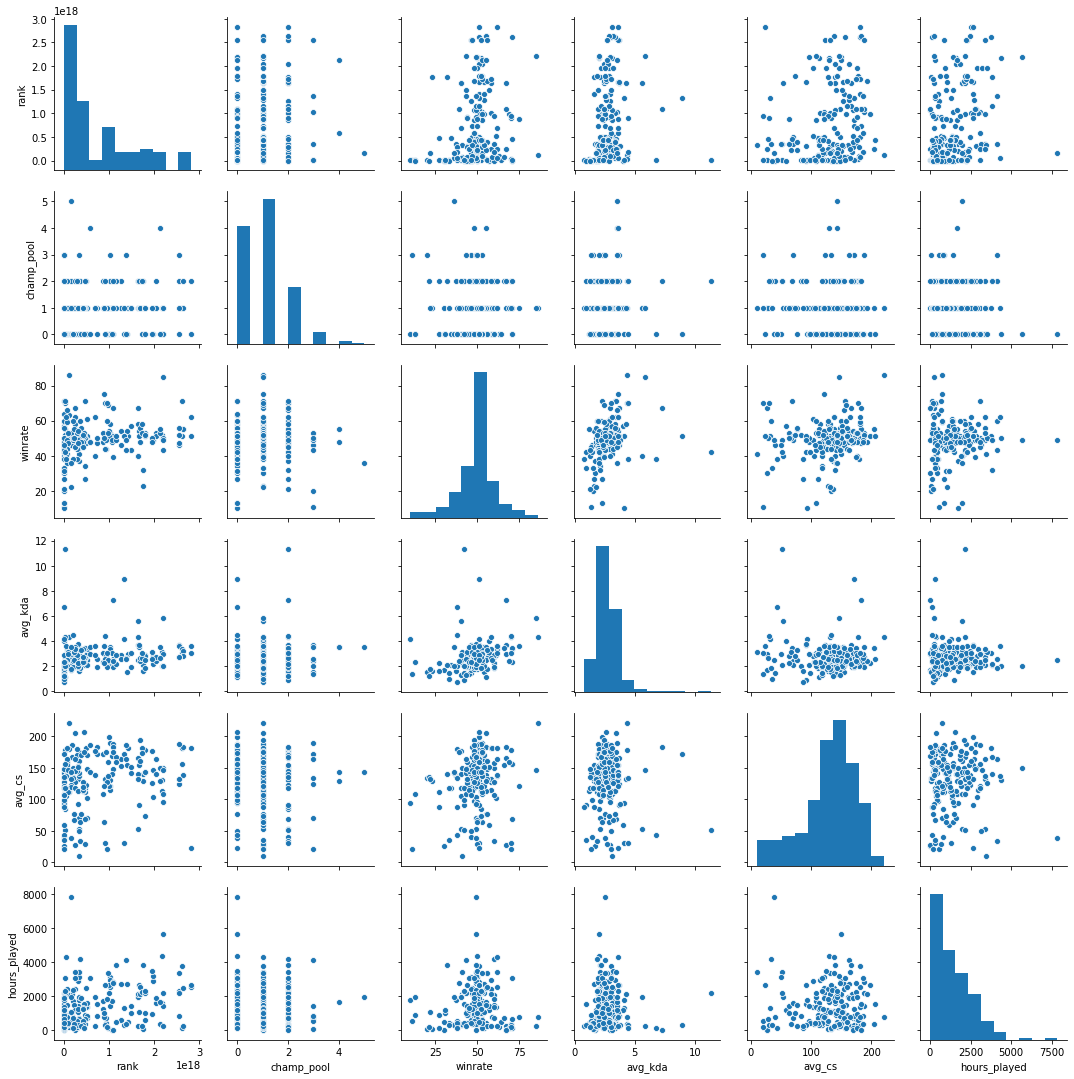

In [330]:
sns.pairplot(data_to_model)

In [333]:
lm = smf.ols('rank ~ champ_pool + winrate + avg_kda + avg_cs + hours_played', data=data_to_model)

fit = lm.fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rank   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     7.499
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           2.01e-06
Time:                        21:59:25   Log-Likelihood:                -7998.3
No. Observations:                 188   AIC:                         1.601e+04
Df Residuals:                     182   BIC:                         1.603e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -7.859e+17   2.99e+17     -2.624      0.009   -1.38e+18   -1.95e+17
champ_pool    7.957e+16   6.15e+16      1.295      0.197   -4.17e+16    2.01e+17
winrate       1.082e+16   5.29e+15      2.044      0.042    3.74e+14    2.13e+16
avg_kda        9.67e+16   4.73e+16      2.043      0.042    3.32e+15     1.9e+17
avg_cs        3.196e+15   1.25e+15      2.547      0.012     7.2e+14    5.67e+15
hours_played   1.83e+14   4.45e+13      4.111      0.000    9.52e+13    2.71e+14
==============================================================================
Omnibus:                       13.204   Durbin-Watson:                   1.241
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.521
Skew:                           0.681   Prob(JB):                     0.000703
Kurtosis:                       2.996   Cond. No.                     1.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [332]:
data_to_model.columns

Index(['summoner_name', 'rank', 'champ_pool', 'winrate', 'avg_kda', 'avg_cs',
       'hours_played'],
      dtype='object')

In [327]:
data_to_model.hours_played = data_to_model.hours_played.astype(float, errors='ignore')

In [353]:
data_to_model

,summoner_name,rank,champ_pool,winrate,avg_kda,avg_cs,hours_played
0,Disturbedmf,1864536679195674112,0,58,3.567143,69.800000,147.0
1,ClianthuS,1864791192015212544,1,75,3.208571,152.157143,1082.0
2,SHUNP0,715572494840384,2,48,3.034286,148.400000,503.0
3,britishbill,714469030912792,2,54,2.046667,28.266667,308.0
4,Codez95,100093175889946127,0,47,2.101429,113.357143,676.0
5,fatnorth759,100108051458837976,1,42,2.545000,18.700000,457.0
6,djaskdjhas,487742619430654281,1,64,2.904286,178.585714,248.0
7,Du Ma Chu,487631095892591301,0,55,4.670000,127.000000,364.0
8,Schoni,1403137477987509824,2,49,3.081429,32.714286,2375.0
9,qeqweqwee,1403193878772587819,0,49,2.702857,53.757143,1457.0


/Users/local/anaconda3/envs/metis/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/local/anaconda3/envs/metis/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


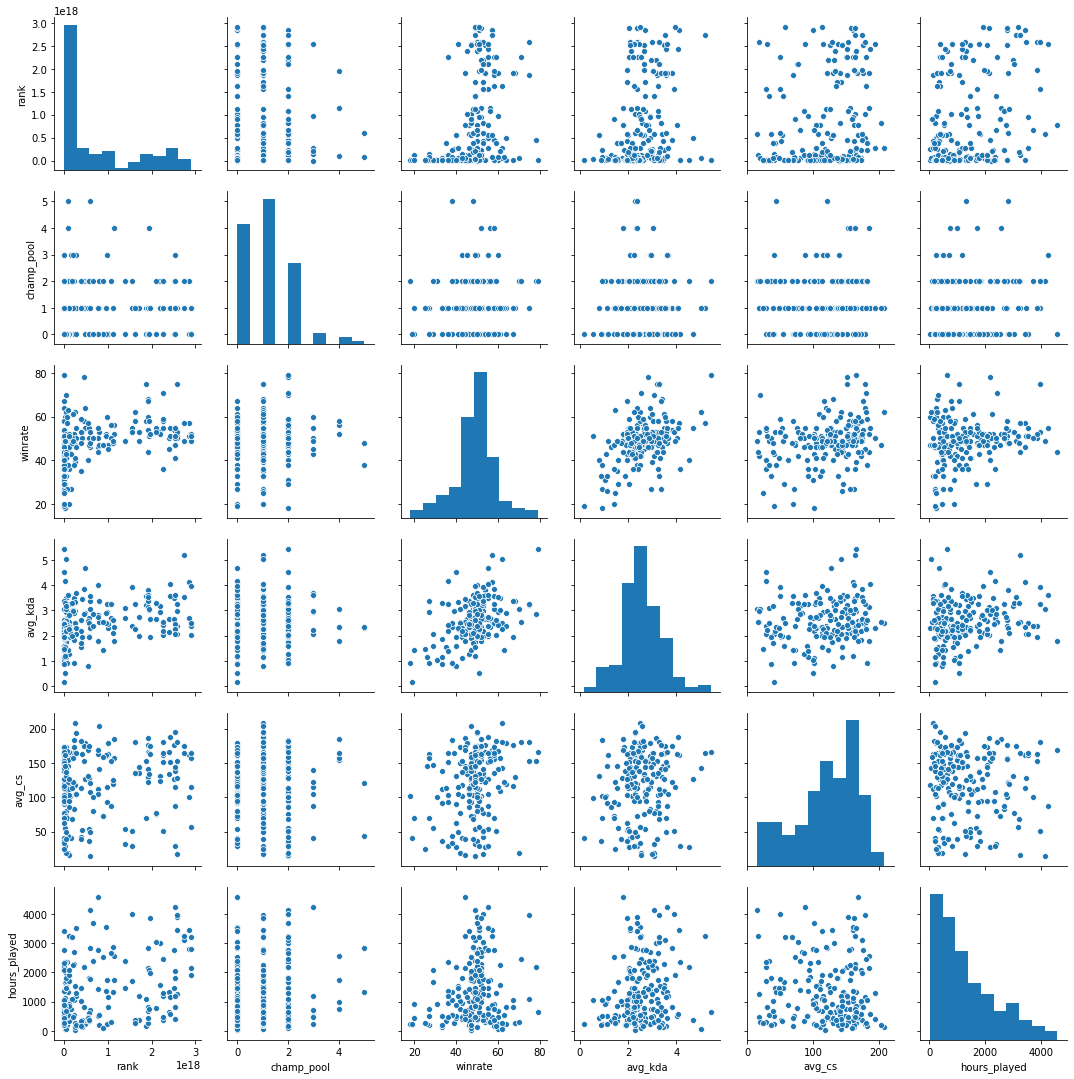

In [355]:
sns.pairplot(data_to_model)

In [361]:
lm1 = smf.ols('rank ~ champ_pool + winrate + avg_kda + avg_cs + hours_played', data=data_to_model)

fit1 = lm1.fit()

fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rank   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     10.66
Date:                Wed, 17 Jul 2019   Prob (F-statistic):           5.03e-09
Time:                        15:08:30   Log-Likelihood:                -8239.2
No. Observations:                 193   AIC:                         1.649e+04
Df Residuals:                     187   BIC:                         1.651e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.085e+18   3.32e+17     -3.268      0.001   -1.74e+18    -4.3e+17
champ_pool   -1.159e+16   6.23e+16     -0.186      0.853   -1.34e+17    1.11e+17
winrate       1.714e+16   7.24e+15      2.366      0.019    2.85e+15    3.14e+16
avg_kda       1.466e+17   8.32e+16      1.762      0.080   -1.76e+16    3.11e+17
avg_cs        2.759e+15   1.36e+15      2.024      0.044    6.96e+13    5.45e+15
hours_played  2.722e+14   5.95e+13      4.575      0.000    1.55e+14     3.9e+14
==============================================================================
Omnibus:                       14.698   Durbin-Watson:                   1.162
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.669
Skew:                           0.665   Prob(JB):                     0.000396
Kurtosis:                       2.574   Cond. No.                     9.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [362]:
# test without inflated rank, just reversed rank
test_model_purerank = data_to_model.copy()

In [366]:
test_model_purerank['rank'][0] = 1864536679195674112

/Users/local/anaconda3/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [371]:
for rank in range(0, len(test_model_purerank['rank'])):
    test_model_purerank['rank'][rank] = test_model_purerank['rank'][rank]**(1/3)
test_model_purerank['rank']

/Users/local/anaconda3/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0      1230807
1      1230863
2        89443
3        89397
4       464302
5       464325
6       787160
7       787100
8      1119523
9      1119538
10      516550
11      516517
12      639741
13      639721
14      837997
15      838044
16      748759
17      748716
18      253748
19      253730
20     1300693
21     1300736
22     1336949
23     1336909
24     1417101
25     1417093
26      421807
27      421886
28      606307
29      606335
        ...   
170     727203
171     727217
172     361838
173     361830
174     317635
175     317603
176     920134
177     920180
178     579677
179     579656
180    1176605
181    1176647
182    1426504
183    1426506
184    1037578
185    1037554
186      97552
187      97525
188     601239
189     601213
190     354383
191     354321
192     483565
193     483534
194     874106
195     874158
196    1313025
197    1313042
198     173197
199     173222
Name: rank, Length: 200, dtype: int64

/Users/local/anaconda3/envs/metis/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/local/anaconda3/envs/metis/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


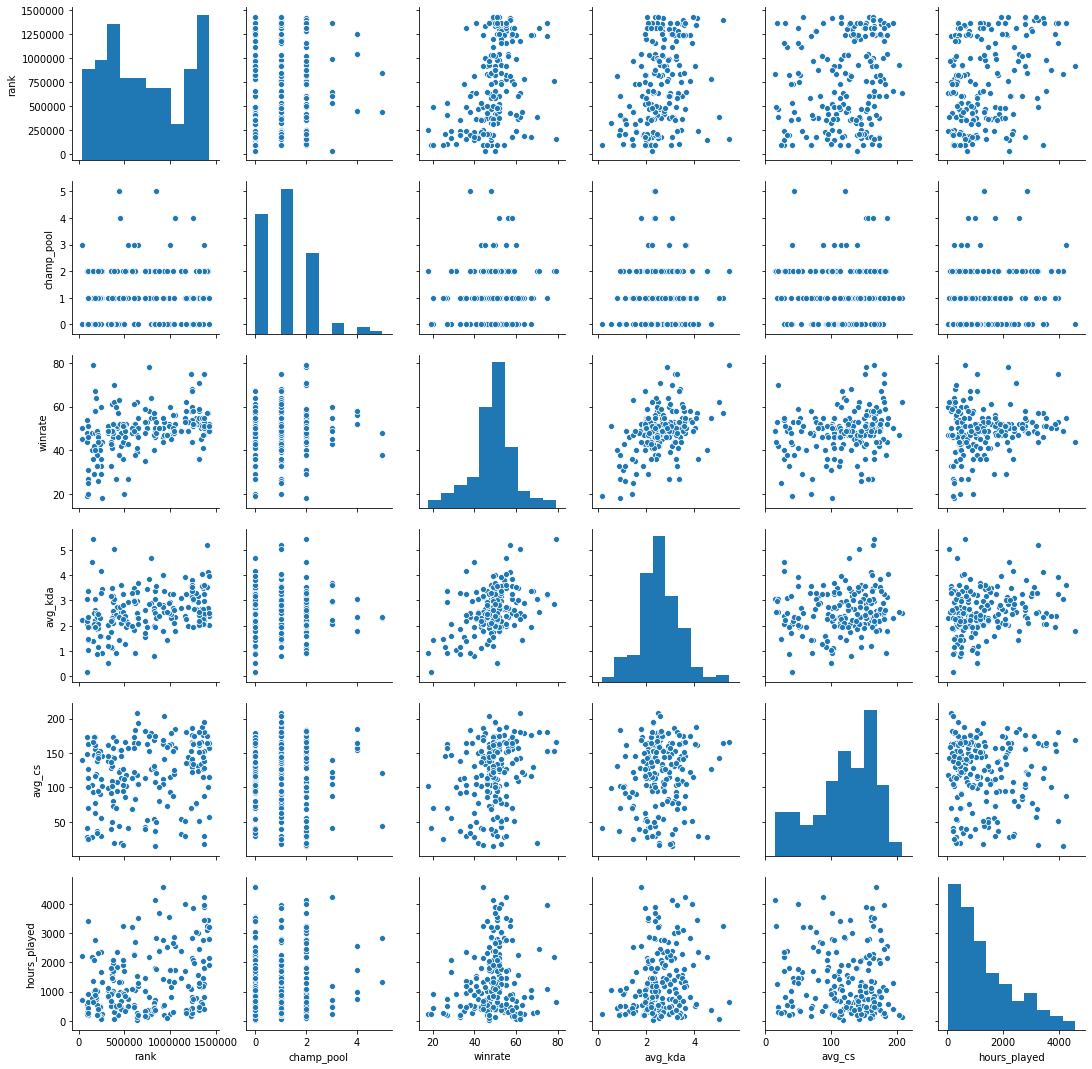

In [372]:
sns.pairplot(test_model_purerank)

In [373]:
test_model_purerank.corr()

,rank,champ_pool,winrate,avg_kda,avg_cs,hours_played
rank,1.000000,0.084472,0.376552,0.301553,0.191184,0.338743
champ_pool,0.084472,1.000000,0.118430,0.021161,-0.093150,0.075063
winrate,0.376552,0.118430,1.000000,0.439139,0.255770,0.158611
avg_kda,0.301553,0.021161,0.439139,1.000000,0.113338,0.188192
avg_cs,0.191184,-0.093150,0.255770,0.113338,1.000000,-0.066837
hours_played,0.338743,0.075063,0.158611,0.188192,-0.066837,1.000000


In [375]:
test_lm = smf.ols('rank ~ champ_pool + winrate + avg_kda + avg_cs + hours_played', data=test_model_purerank)

test_fit = test_lm.fit()

test_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rank   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     12.92
Date:                Wed, 17 Jul 2019   Prob (F-statistic):           8.36e-11
Time:                        15:24:19   Log-Likelihood:                -2750.8
No. Observations:                 193   AIC:                             5514.
Df Residuals:                     187   BIC:                             5533.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2.901e+05   1.48e+05     -1.958      0.052   -5.82e+05    2195.777
champ_pool    8810.3017   2.78e+04      0.317      0.752    -4.6e+04    6.37e+04
winrate       1.114e+04   3233.820      3.445      0.001    4762.017    1.75e+04
avg_kda        6.67e+04   3.72e+04      1.795      0.074   -6589.183     1.4e+05
avg_cs        1177.2174    608.559      1.934      0.055     -23.305    2377.740
hours_played   114.2324     26.561      4.301      0.000      61.835     166.629
==============================================================================
Omnibus:                        5.645   Durbin-Watson:                   1.280
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                3.131
Skew:                          -0.028   Prob(JB):                        0.209
Kurtosis:                       2.378   Cond. No.                     9.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [376]:
# riot api requests
url3 = 'https://na1.api.riotgames.com/lol/summoner/v4/summoners/by-name/Shumushi?api_key=RGAPI-1f31b9f9-494b-4807-b5a4-338f3e7ca799'
response3 = requests.get(url3)
print(response3.text)

{"id":"U9_m_zMuJ9RtGM8CCCaeEwskh4D1-ODD9w-CWYVR8VJn-9s","accountId":"jmSomvdCKbWhRgNSymAIS0rRfP5wJh9LCEt26GNsyf-u8Hg","puuid":"0EOHS_1ebj9clfWRtG9HhquYoyYC8fhEx1lv9vwtDNmbVT-uQ90yYeNPnRVDpXqfn-7B2-0fCTHKSw","name":"Shumushi","profileIconId":1150,"revisionDate":1562216593000,"summonerLevel":182}
